In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_predict, learning_curve
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [5]:
spear = pd.read_csv("/content/drive/MyDrive/Phising/data-phising.csv")
enron = pd.read_csv("/content/drive/MyDrive/Phising/data-enron.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.concat([spear,enron],ignore_index=True)

In [8]:
data

,Unnamed: 0,@ in URLs,Attachments,Css,Dangerous Body,Dangerous Subject,Encoding,External Resources,File,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,SpearPhising,URLs
0,0,False,0,0,23,0,quoted-printable,0,3,False,True,False,False,True,1,True,17
1,1,False,1,0,2,0,none,0,11,False,True,False,False,False,0,True,4
2,2,False,0,0,1,0,quoted-printable,0,6,False,True,False,False,False,0,True,6
3,3,False,0,0,1,0,quoted-printable,0,1,False,True,False,False,False,0,True,2
4,4,False,0,0,1,0,quoted-printable,0,1,False,True,False,False,False,0,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22190,16791,False,0,0,2,0,7bit,0,3,False,False,False,False,False,0,False,0
22191,16792,False,0,0,7,0,7bit,0,15,False,False,False,False,False,0,False,1
22192,16793,False,0,0,0,0,7bit,0,0,False,False,False,False,False,0,False,0
22193,16794,False,0,0,6,0,7bit,0,6,False,False,False,False,False,0,False,1


In [10]:
row1 = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16]]
row2 = data.iloc[:, 15]

In [12]:
row1

,@ in URLs,Attachments,Css,Dangerous Body,Dangerous Subject,Encoding,External Resources,File,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,URLs
0,False,0,0,23,0,quoted-printable,0,3,False,True,False,False,True,1,17
1,False,1,0,2,0,none,0,11,False,True,False,False,False,0,4
2,False,0,0,1,0,quoted-printable,0,6,False,True,False,False,False,0,6
3,False,0,0,1,0,quoted-printable,0,1,False,True,False,False,False,0,2
4,False,0,0,1,0,quoted-printable,0,1,False,True,False,False,False,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22190,False,0,0,2,0,7bit,0,3,False,False,False,False,False,0,0
22191,False,0,0,7,0,7bit,0,15,False,False,False,False,False,0,1
22192,False,0,0,0,0,7bit,0,0,False,False,False,False,False,0,0
22193,False,0,0,6,0,7bit,0,6,False,False,False,False,False,0,1


In [13]:
data=pd.concat([row2, row1], axis=1)

In [14]:
le = LabelEncoder()
le.fit(data.iloc[:,6])
data.iloc[:,6] = le.transform(data.iloc[:,6])

In [16]:
data=data.astype(int)

In [17]:
data

,SpearPhising,@ in URLs,Attachments,Css,Dangerous Body,Dangerous Subject,Encoding,External Resources,File,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,URLs
0,1,0,0,0,23,0,3,0,3,0,1,0,0,1,1,17
1,1,0,1,0,2,0,2,0,11,0,1,0,0,0,0,4
2,1,0,0,0,1,0,3,0,6,0,1,0,0,0,0,6
3,1,0,0,0,1,0,3,0,1,0,1,0,0,0,0,2
4,1,0,0,0,1,0,3,0,1,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22190,0,0,0,0,2,0,0,0,3,0,0,0,0,0,0,0
22191,0,0,0,0,7,0,0,0,15,0,0,0,0,0,0,1
22192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22193,0,0,0,0,6,0,0,0,6,0,0,0,0,0,0,1


In [18]:
X=data.iloc[:, 1:]
Y=data.iloc[:, 0]

In [19]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=1/5, random_state=0)

## GaussianNB


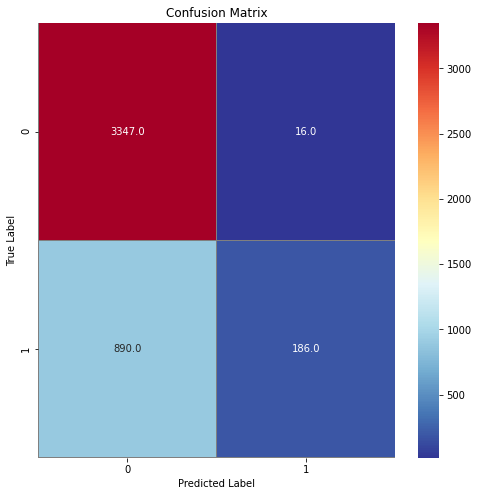

0.7958999774724037
0.8553688977583149
0.5840523983387995
0.5859346429453917


In [ ]:
gnb = GaussianNB()
gnb=gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Y_pred = gnb.predict(x_test)
Y_pred_classes = np.argmax(Y_pred) 
Y_true = np.argmax(y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="RdYlBu_r",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

Accuracy_Score = accuracy_score(y_test, y_pred)
Precision_Score = precision_score(y_test, y_pred,  average="macro")
Recall_Score = recall_score(y_test, y_pred,  average="macro")
F1_Score = f1_score(y_test, y_pred,  average="macro")

print(Accuracy_Score)
print(Precision_Score)
print(Recall_Score)
print(F1_Score)

##BernoulliNB

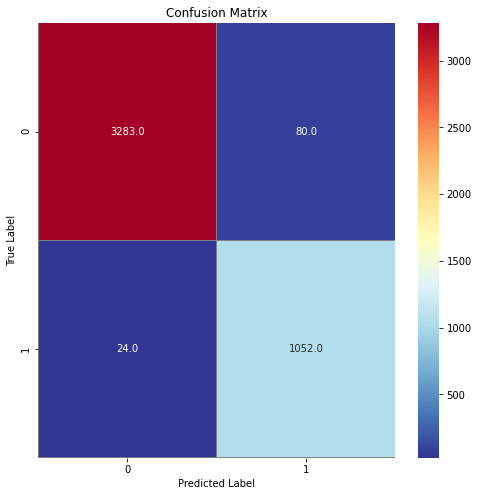

0.9765712998423068
0.9610356444889896
0.9769534415081242
0.9686531734132933


In [ ]:
gnb = BernoulliNB(alpha=1.0)
gnb=gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Y_pred = gnb.predict(x_test)
Y_pred_classes = np.argmax(Y_pred) 
Y_true = np.argmax(y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="RdYlBu_r",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

Accuracy_Score = accuracy_score(y_test, y_pred)
Precision_Score = precision_score(y_test, y_pred,  average="macro")
Recall_Score = recall_score(y_test, y_pred,  average="macro")
F1_Score = f1_score(y_test, y_pred,  average="macro")

print(Accuracy_Score)
print(Precision_Score)
print(Recall_Score)
print(F1_Score)